In [ ]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install yfinance
import yfinance as yf

df = yf.download('AAPL', start='2012-01-01', end='2024-1-17')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416981,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483716,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754258,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400


In [ ]:

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416981,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483716,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754258,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734028,394024400


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.653595,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.700851,46792900
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.102417,49128400
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.431549,40444700
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.147568,65603000


In [ ]:
df.shape

(3028, 6)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3.028000e+03
mean,68.406490,69.144462,67.705585,68.457912,66.232766,1.911549e+08
std,56.128269,56.761374,55.546428,56.188628,56.576241,1.692190e+08
min,13.856071,14.271429,13.753571,13.947500,11.966007,2.404830e+07
25%,24.823125,25.113750,24.623750,24.905001,22.398230,8.663455e+07
50%,41.513750,42.117500,41.128750,41.615000,39.436777,1.299330e+08
75%,124.347498,125.732500,122.774998,124.630001,122.142221,2.300011e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,1.506120e+09


<function matplotlib.pyplot.show(close=None, block=None)>

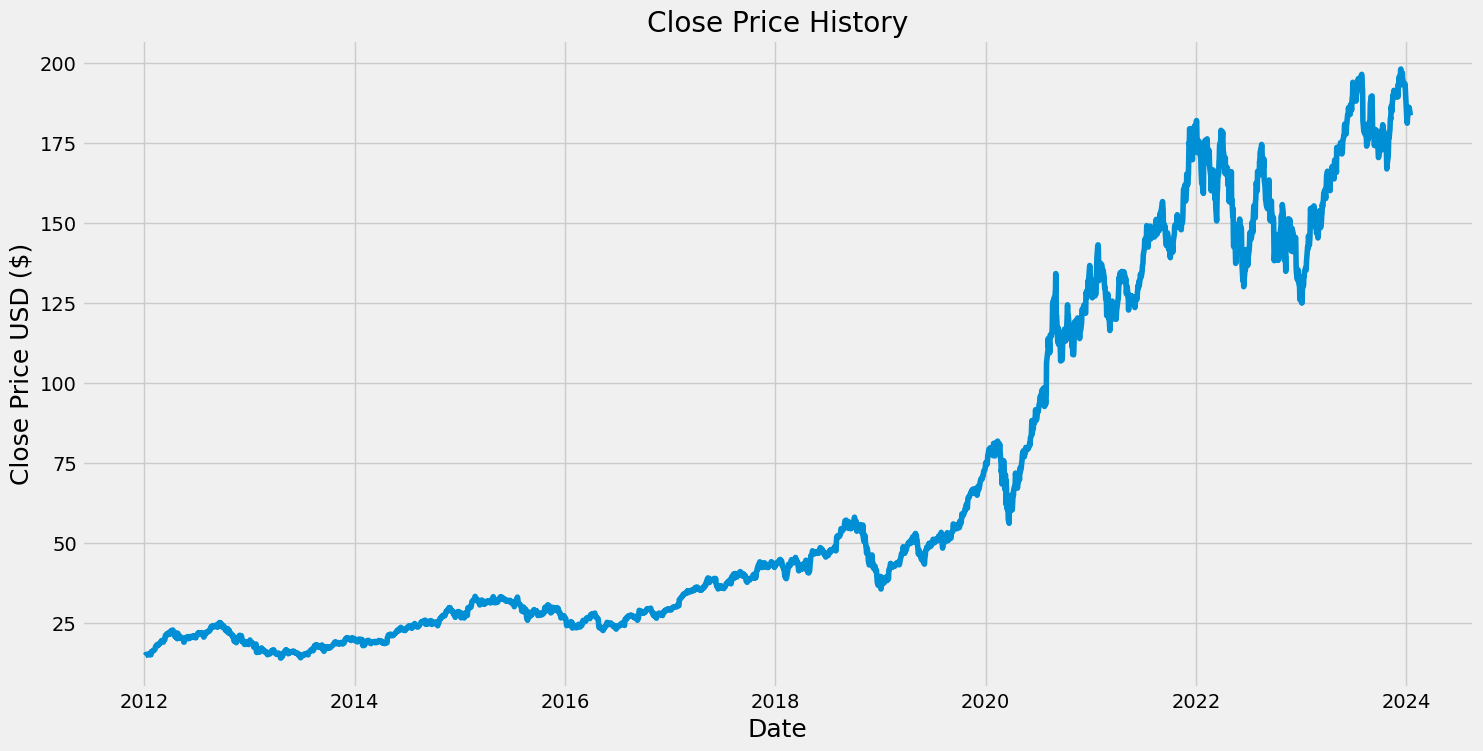

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2423

In [ ]:
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.93201654],
       [0.93380844],
       [0.92137381]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train =[]
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2363, 60, 1)

#Building LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train, batch_size=1, epochs=5)

Epoch 1/5
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - loss: 0.0011
Epoch 2/5
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - loss: 3.9291e-04
Epoch 3/5
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - loss: 3.3411e-04
Epoch 4/5
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - loss: 2.1597e-04
Epoch 5/5
2363/2363 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - loss: 1.6940e-04
